# Importing the necessary library

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import cv2 # open-cv used for image processing  
%matplotlib inline 
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization 

# assigning Directory 

In [3]:
train_dir = r'\\C:\Users\sameb\Downloads\Emergency_Vehicles\train'
test_dir = r'\\C:\Users\sameb\Downloads\Emergency_Vehicles\test'

# Reading the first image

In [4]:
import cv2

train_dir = r'C:\Users\sameb\Downloads\Emergency_Vehicles\train'
test_dir = r'C:\Users\sameb\Downloads\Emergency_Vehicles\test'

img_path = r'C:\Users\sameb\Downloads\Emergency_Vehicles\train\1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting to RGB

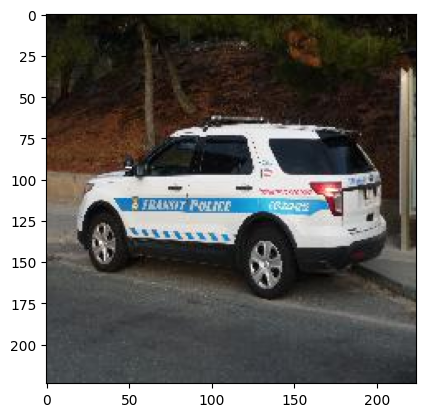

In [5]:
plt.imshow(img) 

In [6]:
img.shape # This shows the shape of the image (length, width,chanel) 

(224, 224, 3)

# Preprocessing

In [7]:
# Here we are applying our desired transformations  
img_gen = ImageDataGenerator(  
    rotation_range=20,# specifies the rotation to be 20% 
    width_shift_range=0.1, # specifies the width shift of 10% 
    height_shift_range=0.1,# specifies the height shift of 10% 
    shear_range=0.20, # crops part of the image  
    zoom_range=0.20, # #zooms the image by 20% 
    fill_mode='nearest', # fills using the nearest pixel  
    horizontal_flip=True, # Secifies the horizontal flip  
    rescale=1/255 # scales the image  
) 

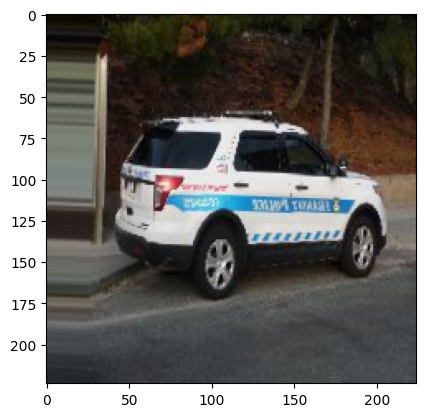

In [8]:
# showing the transformation 
plt.imshow(img_gen.random_transform(img)) 

In [9]:
train_df = pd.read_csv(r'C:\Users\sameb\Downloads\Emergency_Vehicles\train.csv')
test_df = pd.read_csv(r'C:\Users\sameb\Downloads\Emergency_Vehicles\test.csv')

In [10]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [11]:
train_df['emergency_or_not']=train_df['emergency_or_not'].astype(str) 

In [12]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [29]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col='emergency_or_not', # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50# defines the batch size  
                                             ) 
validation_generator=img_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col='emergency_or_not', # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50 # defines the batch size  
                                              )      

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


# 1st Constructor stage 

In [59]:
model = Sequential() 
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same')) 

model.add(Flatten()) 
 
model.add(Dense(50,activation = 'relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1,activation = 'sigmoid')) 

# 1st Compilation stage

In [60]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy') 

In [61]:
model.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 flatten_6 (Flatten)         (None, 1605632)           0         
                                                                 
 dense_12 (Dense)            (None, 50)                80281650  
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 80,282,597
Trainable params: 80,282,597
Non-trainable params: 0
_________________________________________________________________


# 1st Training stage

In [62]:
history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator) 

C:\Users\sameb\AppData\Local\Temp\ipykernel_14864\1853272796.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator)


Epoch 1/10
23/23 [==============================] - 60s 3s/step - loss: 20.0492 - accuracy: 0.5478 - val_loss: 0.8543 - val_accuracy: 0.6008
Epoch 2/10
23/23 [==============================] - 63s 3s/step - loss: 0.7588 - accuracy: 0.5861 - val_loss: 0.6827 - val_accuracy: 0.6512
Epoch 3/10
23/23 [==============================] - 58s 3s/step - loss: 0.6790 - accuracy: 0.5635 - val_loss: 0.6668 - val_accuracy: 0.6028
Epoch 4/10
23/23 [==============================] - 57s 2s/step - loss: 0.6742 - accuracy: 0.5730 - val_loss: 0.6585 - val_accuracy: 0.6270
Epoch 5/10
23/23 [==============================] - 57s 2s/step - loss: 0.6548 - accuracy: 0.6148 - val_loss: 0.6387 - val_accuracy: 0.6310
Epoch 6/10
23/23 [==============================] - 58s 3s/step - loss: 0.6485 - accuracy: 0.5983 - val_loss: 0.6261 - val_accuracy: 0.6835
Epoch 7/10
23/23 [==============================] - 61s 3s/step - loss: 0.6425 - accuracy: 0.6339 - val_loss: 0.6058 - val_accuracy: 0.6956
Epoch 8/10
23/23 [=

result wasn't satisfactory with 68.8% accuracy, so let's increase the layers and see if it can have a better performance

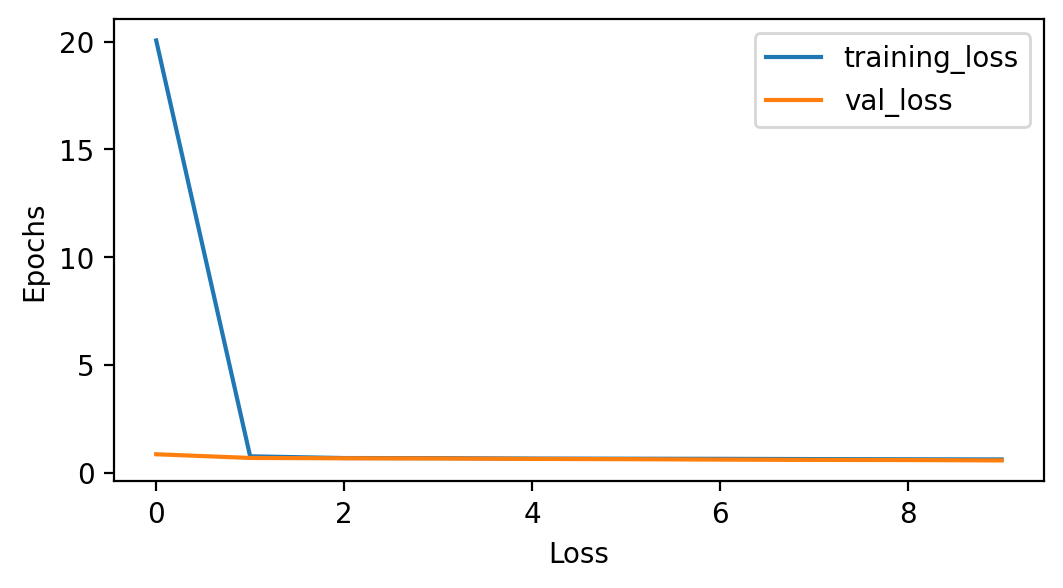

In [63]:
## checking for overfitting 
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (6,3))
plt.plot(history_df['loss'],
 label='training_loss')
plt.plot(history_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

# 2nd Constructor stage

In [34]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(BatchNormalization())

model.add(Flatten())

#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

# 2nd Compilation stage

In [55]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy') 

In [56]:
model.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 flatten_5 (Flatten)         (None, 1605632)           0         
                                                                 
 dense_10 (Dense)            (None, 128)               205521024 
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 205,522,049
Trainable params: 205,522,049
Non-trainable params: 0
_________________________________________________________________


# 2nd Training stage

In [57]:
history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator) 

C:\Users\sameb\AppData\Local\Temp\ipykernel_14864\1853272796.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator)


Epoch 1/10
23/23 [==============================] - 131s 6s/step - loss: 0.5769 - accuracy: 0.7261 - val_loss: 0.5345 - val_accuracy: 0.7540
Epoch 2/10
23/23 [==============================] - 96s 4s/step - loss: 0.5166 - accuracy: 0.7617 - val_loss: 0.4940 - val_accuracy: 0.7903
Epoch 3/10
23/23 [==============================] - 99s 4s/step - loss: 0.5050 - accuracy: 0.7643 - val_loss: 0.4541 - val_accuracy: 0.7964
Epoch 4/10
23/23 [==============================] - 97s 4s/step - loss: 0.4908 - accuracy: 0.7722 - val_loss: 0.4544 - val_accuracy: 0.7923
Epoch 5/10
23/23 [==============================] - 96s 4s/step - loss: 0.4765 - accuracy: 0.7809 - val_loss: 0.4431 - val_accuracy: 0.7984
Epoch 6/10
23/23 [==============================] - 100s 4s/step - loss: 0.4705 - accuracy: 0.7817 - val_loss: 0.4099 - val_accuracy: 0.8125
Epoch 7/10
23/23 [==============================] - 97s 4s/step - loss: 0.4503 - accuracy: 0.7800 - val_loss: 0.4611 - val_accuracy: 0.7964
Epoch 8/10
23/23 [

we have a better training performance her with an accuracy of 76.4% after increasing the layers

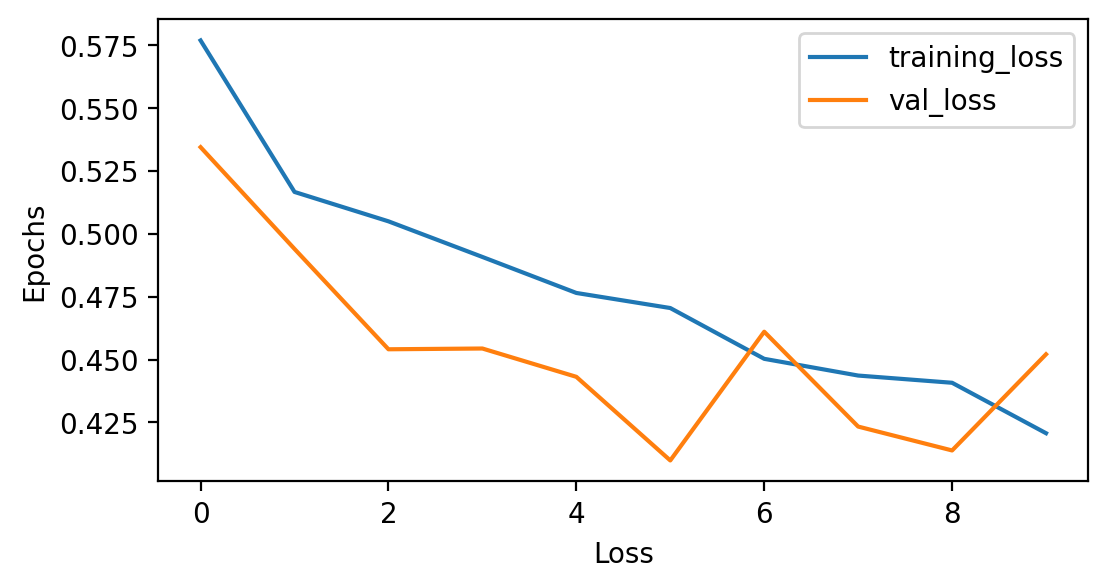

In [58]:
## checking for overfitting 
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (6,3))
plt.plot(history_df['loss'],
 label='training_loss')
plt.plot(history_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

# Evaluation stage

In [51]:
test_generator = img_gen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col='image_names',
    # y_col='emergency_or_not',
    class_mode=None,
    target_size=(224, 224),
    batch_size=1
)

Found 706 validated image filenames.
